In [3]:
>>> from sympy import *
>>> f = Function('f')
>>> X = FunctionMatrix(3, 3, f)
>>> X.as_explicit()

Matrix([
[f(0, 0), f(0, 1), f(0, 2)],
[f(1, 0), f(1, 1), f(1, 2)],
[f(2, 0), f(2, 1), f(2, 2)]])

In [6]:
A, x, b = symbols("A, x, b")
A_x, A_y, B_y = symbols("A_x, A_y, B_y")
b, F, x_t, L = symbols("b, F, x_t, L")

A = Matrix([
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1]
])
x = Matrix([
    [A_x],
    [A_y + B_y],
    [B_y]
])
b = Matrix([
    [0],
    [F],
    [F * x_t / L]
])

solution = A.LUsolve(b.subs({
    F: 100.23,
    x_t: 15,
    L:20
}))

solution

Matrix([
[      0],
[ 100.23],
[75.1725]])

In [12]:
from sympy.abc import epsilon

y=MatrixSymbol('y',5,1)
x=MatrixSymbol('x',5,2)
b=MatrixSymbol('b',2,1)
e=MatrixSymbol('epsilon',5,1)

In [13]:
y.as_explicit()

Matrix([
[y[0, 0]],
[y[1, 0]],
[y[2, 0]],
[y[3, 0]],
[y[4, 0]]])

In [15]:
Eq(y.as_explicit(), MatAdd((x*b).as_explicit(), (e).as_explicit()))

Eq(Matrix([
[y[0, 0]],
[y[1, 0]],
[y[2, 0]],
[y[3, 0]],
[y[4, 0]]]), Matrix([
[b[0, 0]*x[0, 0] + b[1, 0]*x[0, 1]],
[b[0, 0]*x[1, 0] + b[1, 0]*x[1, 1]],
[b[0, 0]*x[2, 0] + b[1, 0]*x[2, 1]],
[b[0, 0]*x[3, 0] + b[1, 0]*x[3, 1]],
[b[0, 0]*x[4, 0] + b[1, 0]*x[4, 1]]]) + Matrix([
[epsilon[0, 0]],
[epsilon[1, 0]],
[epsilon[2, 0]],
[epsilon[3, 0]],
[epsilon[4, 0]]]))

In [16]:
 Eq(y.as_explicit(), MatAdd(MatMul(x.as_explicit(),b.as_explicit()), (e).as_explicit()))

Eq(Matrix([
[y[0, 0]],
[y[1, 0]],
[y[2, 0]],
[y[3, 0]],
[y[4, 0]]]), Matrix([
[epsilon[0, 0]],
[epsilon[1, 0]],
[epsilon[2, 0]],
[epsilon[3, 0]],
[epsilon[4, 0]]]) + Matrix([
[x[0, 0], x[0, 1]],
[x[1, 0], x[1, 1]],
[x[2, 0], x[2, 1]],
[x[3, 0], x[3, 1]],
[x[4, 0], x[4, 1]]])*Matrix([
[b[0, 0]],
[b[1, 0]]]))

In [17]:
M, N, x, y = symbols('M N x y', commutative=False)
solve(M*x + N*y, x)

[-M**(-1)*N*y]

In [18]:
a, b, g = symbols("α β γ", positive=True)
t, p    = symbols("θ φ",   positive=True, nonzero=True)

In [20]:
bres = Matrix([[a - g*sin(t)],
                [b*cos(p) + g*sin(p)*cos(t)],
                [-b*sin(p) + g*cos(p)*cos(t)]])
bres

Matrix([
[               α - γ*sin(θ)],
[ β*cos(φ) + γ*sin(φ)*cos(θ)],
[-β*sin(φ) + γ*cos(θ)*cos(φ)]])

In [22]:
linear_eq_to_matrix(bres, [a,b,g])[0]

Matrix([
[1,       0,       -sin(θ)],
[0,  cos(φ), sin(φ)*cos(θ)],
[0, -sin(φ), cos(θ)*cos(φ)]])

In [23]:
linear_eq_to_matrix(bres, [a,b,g])[1]

Matrix([
[0],
[0],
[0]])

In [33]:
>>> a = [MatrixSymbol(i,2,2) for i in symbols('a1:5')]
>>> A = Matrix(2,2,a)
>>> X = A.inv()
X[1,1]  # [1,1] instead of [2,2] because indexing starts at 0

a1*(a1*a3 - a3*a1)**(-1)

In [34]:
>>> n = 2
>>> v = symbols('b:%s'%n**2,commutative=False)
>>> A = Matrix(n,n,symbols('a:%s'%n**2,commutative=False))
>>> B = Matrix(n,n,v)
>>> eqs = list(A*B - eye(n))
>>> for i in range(n**2):
...   s = solve(eqs[i],v[i])[0]
...   eqs[i+1:] = [e.subs(v[i],s) for e in eqs[i+1:]]
...
>>> s  # solution for v[3] which is B22

-(a2*a0**(-1)*a1 - a3)**(-1)

In [37]:
eqs[0]

-1 + a0*b0 + a1*b2

In [38]:
eqs[1]

a0*b1 + a1*b3

In [45]:
Eq(eqs[0],-eqs[1])

Eq(-1 + a0*b0 + a1*b2, -a0*b1 - a1*b3)

In [48]:
import numpy as np
import sympy
from sympy import *
x, y, z = symbols('x y z')
init_printing(use_unicode=True)

sigma_0 = Matrix([[1, 0],[0, 1]])
sigma_1 = Matrix([[0, 1],[1, 0]])
sigma_2 = Matrix([[0, -I],[I, 0]])

def function_simplifier(x,y,z,a,b,c):
    return simplify(a*x +b*y +c*z)

In [49]:
2*sigma_1 + sigma_2 - 5*sigma_1

⎡  0     -3 - ⅈ⎤
⎢              ⎥
⎣-3 + ⅈ    0   ⎦

In [50]:
function_simplifier(y,z,y,2,1,-5)

In [51]:
A = simplify(function_simplifier(y,z,y,2,1,-5))
f = lambdify((x,y,z),A)

f(sigma_0,sigma_1,sigma_2)

⎡  0     -3 - ⅈ⎤
⎢              ⎥
⎣-3 + ⅈ    0   ⎦

# ***********************************

In [52]:
from sympy import symbols, solve, Eq

q, a, b, c = symbols('q a b c')

def p(q):
    return a - b * q

some_equation = p(q) - c
solutions = solve(some_equation, q)
print("solutions:", solutions)
for sol in solutions:
    print("solution for q =", sol, " --> p(q) =", p(q).subs(q, sol))

solutions: [(a - c)/b]
solution for q = (a - c)/b  --> p(q) = c


In [53]:
some_equation

In [54]:
#######
from sympy import pi, sin, cos, var, simplify
var('j,u,v,w,vt,wt,a2,t,phi')
u0 = v*a2*sin(pi*j/2 + pi*j*t*phi**(-1)/2) + pi*vt*a2*cos(pi*j/2 + pi*j*t*phi**(-1)/2)*j*phi**(-1)/2 + pi*w*a2*cos(pi*j/2 + pi*j*t*phi**(-1)/2)*j*phi**(-1)

In [55]:
u0

In [56]:
simplify(u0)

In [58]:
bj = pi*j*(phi + t)/(2*phi)
cj = j*pi/(2*phi)
#u0 = a2*(v*sin(bj) + cj*vt*cos(bj) + 2*cj*w*cos(bj))

In [59]:
simplify(u0).subs({pi*j*(phi + t)/(2*phi): bj, j*pi/(2*phi): cj})

In [63]:
###################
from sympy import symbols

d2, n1, n2, nc, m2, mm2, n = symbols("d2 n1 n2 nc m2 mm2 n")
np1, np2 = symbols("np1 np2")
cm2 = (d2 * n1 * n2 / nc + m2 * n1 + mm2 * n2) / nc
cm2.subs({n1: np1 * nc, n2: np2 * nc}).simplify()

In [65]:
########################
x, y = symbols("x y")
f = x + y
f.subs({x:10, y: 20})

In [68]:
from sympy import *
eq0 = y - x**2
eq1 = x - z + 4
system = [eq0, eq1]
# solve your system of equation for x, y
solve(system, [x, y], dict=True)[0][y]

In [71]:
In [11]: A,B,C,x,y = sympy.symbols('A,B,C,x,y')

In [12]: pattern = A*x**2 + B*x + C

In [13]: equation = x**2 + 2*x + 3

In [14]: eq = Eq(pattern, equation)

In [72]:
eq

In [73]:
solve_undetermined_coeffs(eq, [A, B, C], x)

In [74]:
In [22]: A, B, C = symbols('A:C', cls=Wild, exclude=[x])

In [23]: x = Symbol('x')

In [24]: (x**2 + 2*x + 3).match(A*x**2 + B*x + C)

In [75]:
from sympy import *
x,y,t,h = symbols('x y t h')

def f(x,y):
    return x + y - 1

y = h * f(t+h,h+f(t,h))
y = expand(y)
y

In [76]:
###################
In [19]: import sympy as sp

In [20]: m, E, h_bar, n = sp.symbols('m, E, h_bar, n', positive=True)

In [21]: eq1 = sp.Eq(sp.sqrt(2 * m * E) / h_bar, n * pi)
eq1

In [81]:
E_n = solve(eq1, E)[0]
E_n

In [82]:
E_n.subs(n, 1)

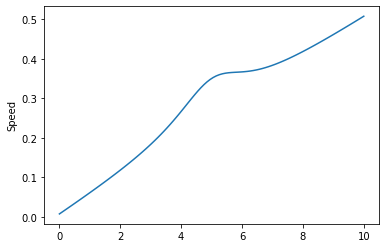

In [5]:
##################
from sympy import symbols
from numpy import linspace
from sympy import lambdify
import matplotlib.pyplot as mpl

t = symbols('t')
x = 0.05*t + 0.2/((t - 5)**2 + 2)
lam_x = lambdify(t, x, modules=['numpy'])

x_vals = linspace(0, 10, 100)
y_vals = lam_x(x_vals)

mpl.plot(x_vals, y_vals)
mpl.ylabel("Speed")
mpl.show()

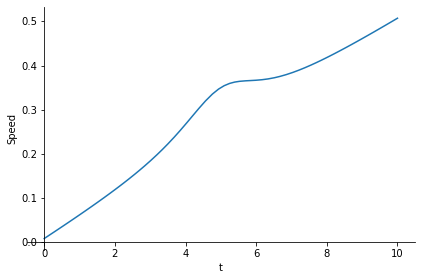

In [6]:
from sympy import symbols
from sympy import plot

t = symbols('t')
x = 0.05*t + 0.2/((t - 5)**2 + 2)

plot(x, (t, 0, 10), ylabel='Speed')

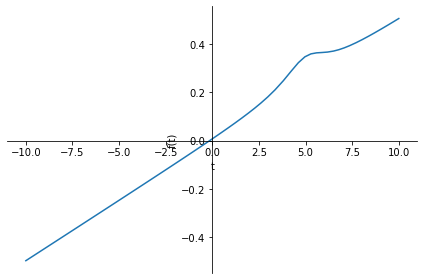

In [7]:
from sympy import symbols
from sympy.plotting import plot as symplot

t = symbols('t')
x = 0.05*t + 0.2/((t - 5)**2 + 2)
symplot(x)

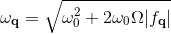

How do I convert the following equation, as a function of f_q (which is a function of 2D-vector q) into a graphical representation?

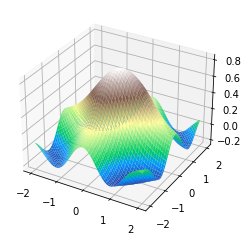

In [8]:
from sympy import sin, lambdify
from sympy.abc import x, y, a, b

f = sin(a*x*y+b) / (x*x+y*y+1)
# convert to a numpy function, make sure all variables apart from x and y have a fixed value
f_np = lambdify((x,y), f.subs({a: 1.5, b: 1}), 'numpy')


from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

x, y = np.meshgrid(np.linspace(-2,2,100), np.linspace(-2,2,100))
z = f_np(x, y)

fig = plt.figure()
ax = plt.axes(projection="3d")
ax.plot_surface(x, y, z, edgecolor='none', cmap='terrain')

plt.show()

In [10]:
f

sin(a*x*y + b)/(x**2 + y**2 + 1)

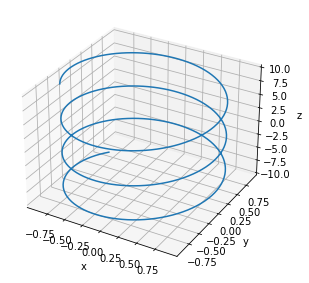

In [11]:
from sympy import *
from sympy.plotting import plot3d_parametric_line

t = symbols('t')
alpha = [cos(t), sin(t), t]
plot3d_parametric_line(*alpha)

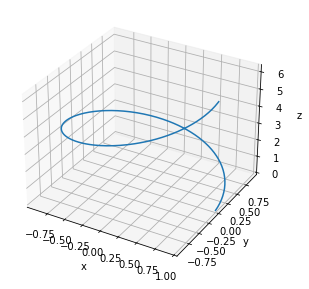

In [12]:
plot3d_parametric_line(cos(t), sin(t), t, (t, 0, 2*pi))

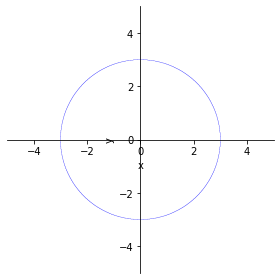

In [13]:
from sympy import Eq, plot_implicit
from sympy.abc import x, y

plot_implicit(Eq(x ** 2 + y ** 2, 9), aspect_ratio=(1, 1))

11


I am turning my comment into an answer. I suggest to use mayavi and contour3d for this task. You can always rewrite your implicit function to be f(x,y,z)=0. For a sphere we have x^2 + y^2 + z^2 = r^2, that can be rewritten as f(x,y,z) = x^2 + y^2 + z^2 - r^2 = 0.

Below, some examples

In [14]:
import numpy as np
from mayavi import mlab

mlab.clf()
x, y, z = np.mgrid[-3:3:50j, -3:3:50j, -3:3:50j]

# Plot a sphere of radius 1
values = x*x + y*y + z*z - np.sqrt(3)
mlab.contour3d(x, y, z, values, contours=[0])
mlab.axes()

# Plot a torus
R = 2
r = 1
values = (R - np.sqrt(x**2 + y**2))**2 + z**2 - r**2
mlab.figure()
mlab.contour3d(x, y, z, values, contours=[0])
mlab.axes()

# Plot a Scherk's second surface
x, y, z = np.mgrid[-4:4:100j, -4:4:100j, -8:8:100j]
values = np.sin(z) - np.sinh(x)*np.sinh(y)
mlab.figure()
mlab.contour3d(x, y, z, values, contours=[0])
mlab.axes()
mlab.show()

ModuleNotFoundError: No module named 'mayavi'

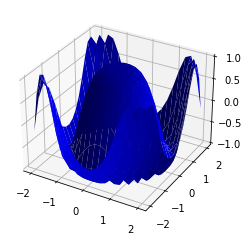

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

# symbolic expression
x, y, t = sp.symbols("x, y, t")
expr = sp.cos((x**2 + y**2) * t)
# convert to numerical function
func = sp.lambdify([x, y, t], expr)

# numerical discretization 
x, y = np.mgrid[-2:2:20j, -2:2:20j]
# evaluate the function at time t=0
z = func(x, y, 0)
  
plt.ion()
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
surface = ax.plot_surface(x, y, z, color="b")
ax.set_zlim(-1, 1)

for t in np.linspace(0, 1):
    # sadly, its not possible to update a surface.
    # hence, we remove the previous and add a new one
    surface.remove()
    # add a new 3d surface
    surface = ax.plot_surface(x, y, func(x, y, t), color="b")
    fig.canvas.draw()
    fig.canvas.flush_events()